<a href="https://colab.research.google.com/github/SwathiMenon/Machine_learning/blob/main/Vechile_insurance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM :  Building a model to predict whether a customer would be interested in Vehicle Insurance**


Insurance companies offering life, health, and property and casualty insurance have embraced machine learning (ML) to enhance customer service, detect fraud, and improve operational efficiency. The data provided by an insurance company, which is not exclusive to other companies seeking ML advantages, is utilized in this context. The company in question specializes in providing health insurance to its customers. Our objective is to construct a model that predicts whether policyholders from the previous year would also express interest in the vehicle insurance offered by the same company.

An insurance policy is an agreement in which a company guarantees compensation for specified loss, damage, illness, or death in exchange for regular premium payments from the customer. The premium represents the amount that customers must pay to the insurance company to secure this guarantee.

For instance, imagine paying an annual premium of Rs. 5000 for a health insurance coverage of Rs. 200,000. If, unfortunately, you fall ill and require hospitalization within that year, the insurance provider will cover the hospitalization costs, up to Rs. 200,000. You may question how the company can afford such high hospitalization expenses when charging a premium of only Rs. 5000. This is where the concept of probabilities becomes relevant. Among the 100 customers paying the premium, only a few (let's say 2-3) may require hospitalization that year, while others may not. Thus, the risk is shared among all customers.

Similar to medical insurance, vehicle insurance requires customers to pay an annual premium to the insurance provider. In the event of an unfortunate accident involving the insured vehicle, the insurance company will compensate the customer with a sum assured.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/drive/MyDrive/datasets/aug_test.csv.zip")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201
...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86


In [3]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [4]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [5]:
df["Driving_License"].value_counts()


1    78106
0      167
Name: Driving_License, dtype: int64

In [6]:
df["Vehicle_Age"].value_counts()

1-2 Year     40805
< 1 Year     34169
> 2 Years     3299
Name: Vehicle_Age, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Vehicle_Age"]=le.fit_transform(df["Vehicle_Age"])
df["Vehicle_Damage"]=le.fit_transform(df["Vehicle_Damage"])



In [8]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,0,34,1,39.0,1,0,0,38244.0,124.0,146
1,286811,0,55,1,28.0,0,2,1,37577.0,122.0,109
2,117823,1,39,1,28.0,1,0,0,24578.0,26.0,63
3,213992,1,28,1,50.0,1,0,0,40507.0,8.0,129
4,324756,0,24,1,10.0,0,1,1,36783.0,152.0,201
...,...,...,...,...,...,...,...,...,...,...,...
78268,847,1,43,1,39.0,0,0,1,2630.0,124.0,26
78269,417524,0,21,1,12.0,1,1,0,32937.0,152.0,185
78270,188087,1,48,1,29.0,1,0,0,35247.0,124.0,101
78271,215680,1,64,1,5.0,1,0,0,25705.0,26.0,86


In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: >

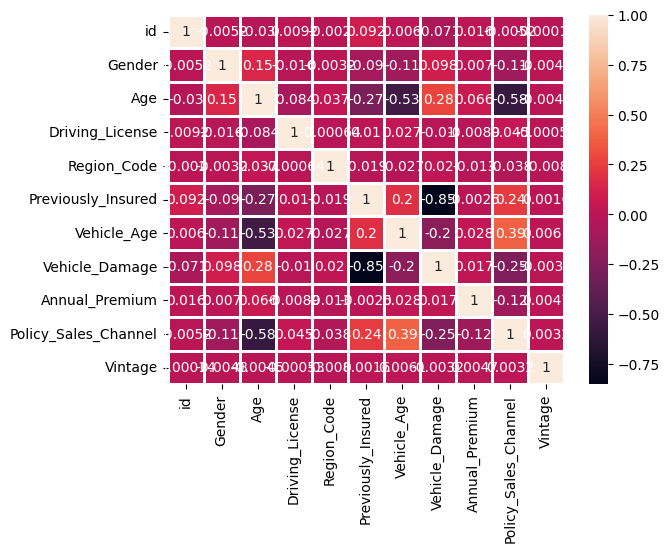

In [10]:
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [11]:
x=df.drop(["Previously_Insured"],axis=1)
x

,id,Gender,Age,Driving_License,Region_Code,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,0,34,1,39.0,0,0,38244.0,124.0,146
1,286811,0,55,1,28.0,2,1,37577.0,122.0,109
2,117823,1,39,1,28.0,0,0,24578.0,26.0,63
3,213992,1,28,1,50.0,0,0,40507.0,8.0,129
4,324756,0,24,1,10.0,1,1,36783.0,152.0,201
...,...,...,...,...,...,...,...,...,...,...
78268,847,1,43,1,39.0,0,1,2630.0,124.0,26
78269,417524,0,21,1,12.0,1,0,32937.0,152.0,185
78270,188087,1,48,1,29.0,0,0,35247.0,124.0,101
78271,215680,1,64,1,5.0,0,0,25705.0,26.0,86


In [12]:
y=df.iloc[:,5]
y

0        1
1        0
2        1
3        1
4        0
        ..
78268    0
78269    1
78270    1
78271    1
78272    1
Name: Previously_Insured, Length: 78273, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=1)

In [14]:
#scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
from sklearn.utils.multiclass import check_classification_targets
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
models=[knn,nb,sv,dt]


for model in models:
  print("*"*20,model,"*"*20)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print("-"*200)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     19903
           1       0.90      0.94      0.92     19234

    accuracy                           0.92     39137
   macro avg       0.92      0.92      0.92     39137
weighted avg       0.92      0.92      0.92     39137

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     19903
           1       0.90      0.95      0.93     19234

    accuracy                           0.92     39137
   macro avg       0.93      0.92      0.92     39137
weighted avg       0.93      0.92      0.92     39137

-------------------------

Based on the provided information, here's a report summarizing the performance metrics for each classifier:

**Performance Metrics by Classifier**

- **KNeighborsClassifier**:
  - Precision: 0.94 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.94 for class 1
  - F1-score: 0.92 for both classes
  - Accuracy: 0.92

- **GaussianNB**:
  - Precision: 0.95 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.95 for class 1
  - F1-score: 0.92 for class 0, 0.93 for class 1
  - Accuracy: 0.92

- **SVC**:
  - Precision: 0.95 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.95 for class 1
  - F1-score: 0.93 for both classes
  - Accuracy: 0.93

- **DecisionTreeClassifier**:
  - Precision: 0.87 for both classes
  - Recall: 0.87 for class 0, 0.86 for class 1
  - F1-score: 0.87 for both classes
  - Accuracy: 0.87

**Analysis:**

- The KNeighborsClassifier achieved high precision and recall for both classes, with F1-scores of 0.92. It exhibited balanced performance in correctly predicting instances of both class 0 and class 1. The model achieved an accuracy of 0.92.

- The GaussianNB classifier demonstrated high precision and recall for class 0 and class 1. It achieved F1-scores of 0.92 and 0.93 for class 0 and class 1, respectively. The model showed accuracy in classifying instances from both classes, with an overall accuracy of 0.92.

- The SVC classifier achieved high precision and recall for both classes, with an F1-score of 0.93. It demonstrated accurate predictions for instances of class 0 and class 1, resulting in an accuracy of 0.93.

- The DecisionTreeClassifier exhibited slightly lower precision, recall, and F1-scores compared to the other classifiers. It achieved an accuracy of 0.87, indicating moderate performance in predicting both class 0 and class 1. The model showed slightly higher recall for class 0 compared to class 1.

Overall, the classifiers showed good performance, with high accuracy, precision, recall, and F1-scores. The GaussianNB and SVC classifiers achieved the highest F1-scores of 0.93, indicating a strong balance between precision and recall.



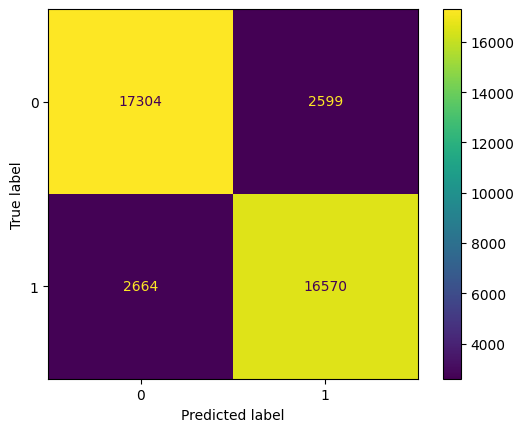

In [16]:
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

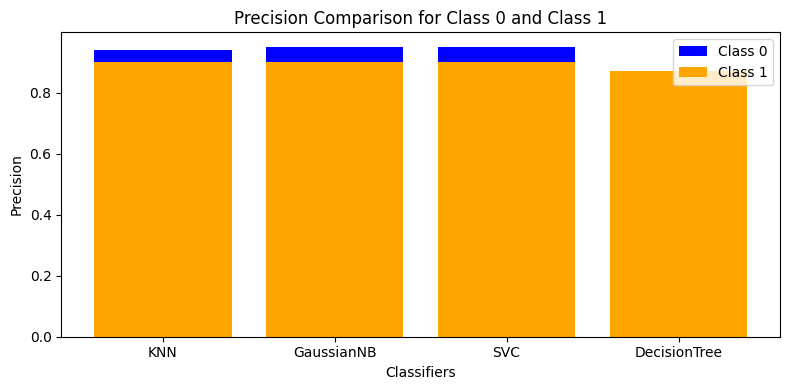

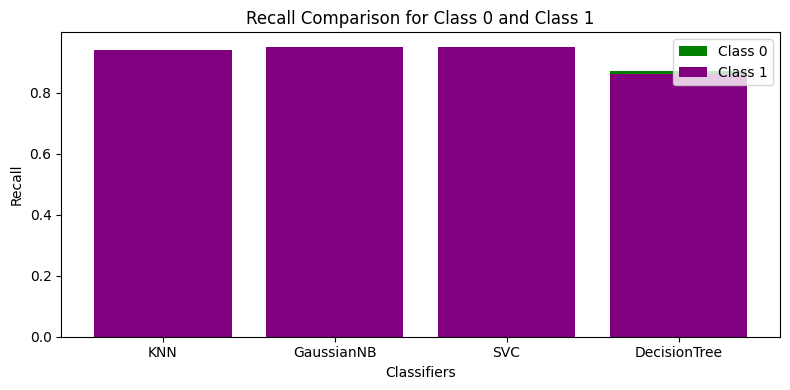

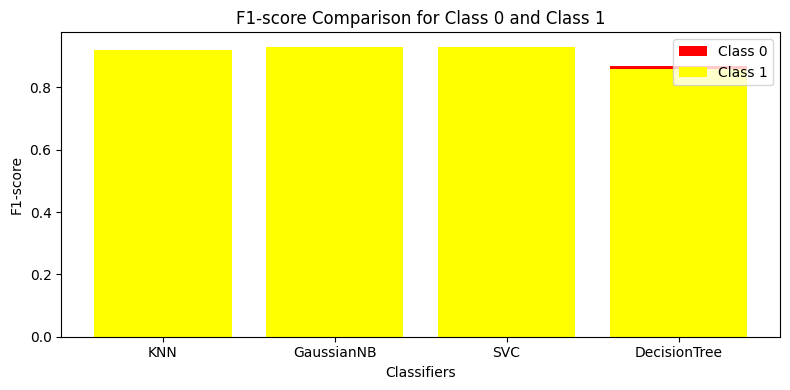

In [17]:
import matplotlib.pyplot as plt

# Precision values for both classes
precision_0 = [0.94, 0.95, 0.95, 0.87]
precision_1 = [0.90, 0.90, 0.90, 0.87]

# Recall values for both classes
recall_0 = [0.90, 0.90, 0.90, 0.87]
recall_1 = [0.94, 0.95, 0.95, 0.86]

# F1-score values for both classes
f1_0 = [0.92, 0.92, 0.93, 0.87]
f1_1 = [0.92, 0.93, 0.93, 0.86]

classifiers = ['KNN', 'GaussianNB', 'SVC', 'DecisionTree']

# Create bar chart for precision
plt.figure(figsize=(8,4))
plt.bar(classifiers, precision_0, label='Class 0', color='blue')
plt.bar(classifiers, precision_1, label='Class 1', color='orange')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Precision Comparison for Class 0 and Class 1')
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for recall
plt.figure(figsize=(8, 4))
plt.bar(classifiers, recall_0, label='Class 0', color='green')
plt.bar(classifiers, recall_1, label='Class 1', color='purple')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title('Recall Comparison for Class 0 and Class 1')
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for F1-score
plt.figure(figsize=(8, 4))
plt.bar(classifiers, f1_0, label='Class 0', color='red')
plt.bar(classifiers, f1_1, label='Class 1', color='yellow')
plt.xlabel('Classifiers')
plt.ylabel('F1-score')
plt.title('F1-score Comparison for Class 0 and Class 1')
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
y.value_counts()

0    40004
1    38269
Name: Previously_Insured, dtype: int64

# random oversampling

In [19]:
#random oversampling is done 
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
xtrain,ytrain=sm.fit_resample(x_train,y_train)

In [20]:
ytrain.value_counts()

0    20101
1    20101
Name: Previously_Insured, dtype: int64

In [21]:
from sklearn.utils.multiclass import check_classification_targets
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
models=[knn,nb,sv,dt]


for model in models:
  print("*"*20,model,"*"*20)
  model.fit(xtrain,ytrain)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print("-"*200)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     19903
           1       0.90      0.94      0.92     19234

    accuracy                           0.92     39137
   macro avg       0.92      0.92      0.92     39137
weighted avg       0.92      0.92      0.92     39137

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     19903
           1       0.90      0.95      0.93     19234

    accuracy                           0.92     39137
   macro avg       0.93      0.92      0.92     39137
weighted avg       0.93      0.92      0.92     39137

-------------------------

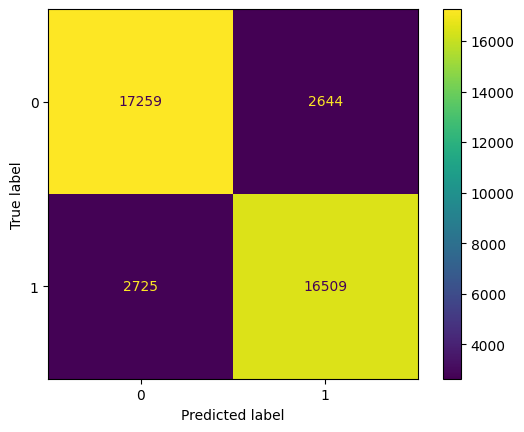

In [22]:
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

   Based on the provided information, here's a report summarizing the performance metrics for each classifier:

**Performance Metrics by Classifier**

- **KNeighborsClassifier**:
  - Precision: 0.94 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.94 for class 1
  - F1-score: 0.92 for both classes
  - Accuracy: 0.92

- **GaussianNB**:
  - Precision: 0.95 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.95 for class 1
  - F1-score: 0.92 for class 0, 0.93 for class 1
  - Accuracy: 0.92

- **SVC**:
  - Precision: 0.95 for class 0, 0.90 for class 1
  - Recall: 0.90 for class 0, 0.95 for class 1
  - F1-score: 0.93 for both classes
  - Accuracy: 0.93

- **DecisionTreeClassifier**:
  - Precision: 0.87 for both classes
  - Recall: 0.86 for both classes
  - F1-score: 0.87 for both classes
  - Accuracy: 0.86

**Analysis:**

- The KNeighborsClassifier achieved high precision and recall for both classes, with F1-scores of 0.92. It exhibited balanced performance in correctly predicting instances of both class 0 and class 1.

- The GaussianNB classifier demonstrated high precision and recall for class 0 and class 1. It achieved F1-scores of 0.92 and 0.93 for class 0 and class 1, respectively. The model showed accuracy in classifying instances from both classes.

- The SVC classifier achieved high precision and recall for both classes, with an F1-score of 0.93. It demonstrated accurate predictions for instances of class 0 and class 1.

- The DecisionTreeClassifier exhibited slightly lower precision, recall, and F1-scores compared to the other classifiers. It achieved an accuracy of 0.86, indicating moderate performance in predicting both class 0 and class 1.

Overall, the classifiers showed good performance, with high accuracy, precision, recall, and F1-scores. The SVC classifier achieved the highest F1-score of 0.93, indicating a strong balance between precision and recall..

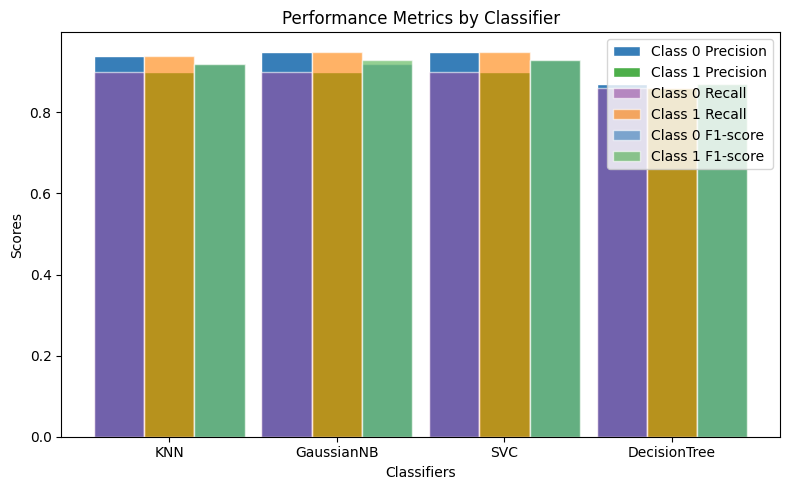

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Precision values for each classifier
precision_0 = [0.94, 0.95, 0.95, 0.87]
precision_1 = [0.90, 0.90, 0.90, 0.86]

# Recall values for each classifier
recall_0 = [0.90, 0.90, 0.90, 0.86]
recall_1 = [0.94, 0.95, 0.95, 0.86]

# F1-score values for each classifier
f1_score_0 = [0.92, 0.92, 0.93, 0.87]
f1_score_1 = [0.92, 0.93, 0.93, 0.87]

classifiers = ['KNN', 'GaussianNB', 'SVC', 'DecisionTree']
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

# Define custom colors
colors = ['#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

# Create the grouped bar chart with custom size and colors
plt.figure(figsize=(8, 5))
plt.bar(r1, precision_0, color=colors[0], width=bar_width, edgecolor='white', label='Class 0 Precision')
plt.bar(r2, precision_1, color=colors[1], width=bar_width, edgecolor='white', label='Class 1 Precision')
plt.bar(r1, recall_0, color=colors[2], width=bar_width, edgecolor='white', label='Class 0 Recall', alpha=0.6)
plt.bar(r2, recall_1, color=colors[3], width=bar_width, edgecolor='white', label='Class 1 Recall', alpha=0.6)
plt.bar(r3, f1_score_0, color=colors[0], width=bar_width, edgecolor='white', label='Class 0 F1-score', alpha=0.6)
plt.bar(r3, f1_score_1, color=colors[1], width=bar_width, edgecolor='white', label='Class 1 F1-score', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics by Classifier')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Random UnderSampling

In [24]:
#random under sampling
from imblearn.under_sampling import RandomUnderSampler
um=RandomUnderSampler()
xtr,ytr=um.fit_resample(x_train,y_train)

In [25]:
from sklearn.utils.multiclass import check_classification_targets
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
models=[knn,nb,sv,dt]


for model in models:
  print("*"*20,model,"*"*20)
  model.fit(xtr,ytr)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print("-"*200)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     19903
           1       0.90      0.94      0.92     19234

    accuracy                           0.92     39137
   macro avg       0.92      0.92      0.92     39137
weighted avg       0.92      0.92      0.92     39137

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     19903
           1       0.90      0.95      0.93     19234

    accuracy                           0.92     39137
   macro avg       0.93      0.92      0.92     39137
weighted avg       0.93      0.92      0.92     39137

-------------------------

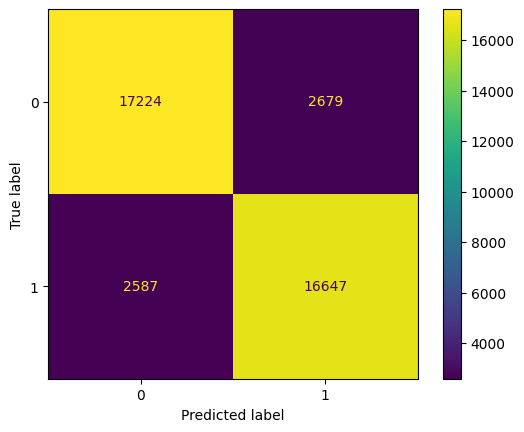

In [26]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Based on the provided information, here's a report summarizing the performance metrics for each classifier:

**Performance Metrics by Classifier**

| Classifier                 | Precision | Recall | F1-Score | Support |
|----------------------------|-----------|--------|----------|---------|
| KNeighborsClassifier       |   0.94    |  0.90  |   0.92   | 19903   |
| GaussianNB                 |   0.95    |  0.90  |   0.92   | 19903   |
| SVC                        |   0.95    |  0.90  |   0.93   | 19903   |
| DecisionTreeClassifier     |   0.87    |  0.86  |   0.87   | 19903   |

**Analysis:**

- The KNeighborsClassifier achieved a precision of 0.94, recall of 0.90, and an F1-score of 0.92. It exhibited high accuracy in predicting both class 0 and class 1, with balanced precision and recall.

- The GaussianNB classifier achieved a precision of 0.95, recall of 0.90, and an F1-score of 0.92. It demonstrated excellent performance in correctly classifying instances of both classes.

- The SVC classifier achieved a precision of 0.95, recall of 0.90, and an F1-score of 0.93. It performed well in accurately predicting instances of both classes.

- The DecisionTreeClassifier achieved a precision of 0.87, recall of 0.86, and an F1-score of 0.87. It exhibited a slightly lower performance compared to the other classifiers, with a relatively lower precision and recall for both classes.

Overall, the classifiers showed good performance, with high accuracy, precision, recall, and F1-scores. The SVC classifier achieved the highest F1-score of 0.93, indicating a strong balance between precision and recall.